In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import datetime

In [3]:
import yfinance as yf

In [4]:

start = datetime.date(2023, 1, 25)
end = datetime.date(2023, 1, 27)

df = yf.download('TATAPOWER.NS' , start , end , interval = '1m')

# end = datetime.date(2023, 1, 31)

# df_nifty = yf.download("^NSEI", start, end, interval="1h" )

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-25 09:15:00+05:30,205.850006,206.250000,205.649994,206.050003,206.050003,0
2023-01-25 09:16:00+05:30,205.899994,206.050003,205.800003,206.000000,206.000000,33110
2023-01-25 09:17:00+05:30,205.949997,206.000000,205.300003,205.500000,205.500000,77681
2023-01-25 09:18:00+05:30,205.449997,205.550003,205.199997,205.300003,205.300003,34396
2023-01-25 09:19:00+05:30,205.300003,205.300003,205.050003,205.100006,205.100006,22440
...,...,...,...,...,...,...
2023-01-25 15:26:00+05:30,201.899994,202.000000,201.899994,202.000000,202.000000,44589
2023-01-25 15:27:00+05:30,202.000000,202.000000,201.949997,202.000000,202.000000,35031
2023-01-25 15:28:00+05:30,202.000000,202.100006,202.000000,202.100006,202.100006,40634


In [6]:
df['Volume'].mean()

25517.80585106383

In [7]:
df['Volume'].max()

177645

In [8]:
df.nsmallest(5, ['Volume'])

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-25 09:15:00+05:30,205.850006,206.250000,205.649994,206.050003,206.050003,0
2023-02-01 15:30:00+05:30,205.850006,205.850006,205.850006,205.850006,205.850006,0
2023-01-25 13:20:00+05:30,202.699997,202.750000,202.600006,202.649994,202.649994,2390
2023-01-25 11:03:00+05:30,203.100006,203.149994,203.050003,203.149994,203.149994,2585
2023-01-25 12:58:00+05:30,202.699997,202.750000,202.600006,202.750000,202.750000,3683


<AxesSubplot:xlabel='Datetime'>

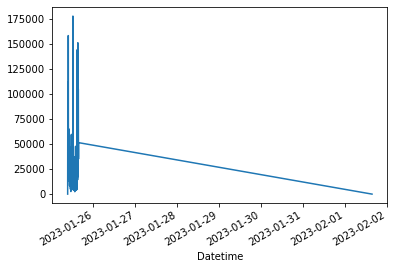

In [9]:
df['Volume'].plot()

In [10]:
ls = df['Volume']

<AxesSubplot:>

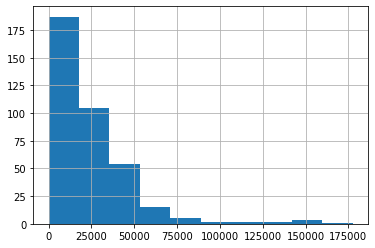

In [11]:
df['Volume'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2bad4b38a00>,
 'caps': [<matplotlib.lines.Line2D at 0x2bad4b38fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bad4b38730>],
 'medians': [<matplotlib.lines.Line2D at 0x2bad4b43580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bad4b43850>],
 'means': []}

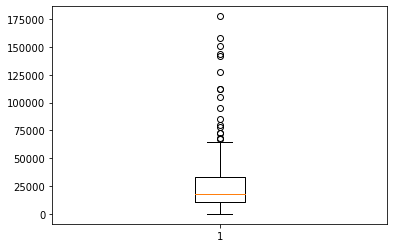

In [19]:
plt.boxplot(df['Volume'], notch=None, vert=None, patch_artist=None, widths=None)

In [12]:
df['Volume'].sum()

9594695

In [13]:
cap = df['Volume'].mean()

In [14]:
for index, row in df.iterrows():
#     print(row['Volume'], '\n')
    cap += row['Volume']
    
    if cap>= 100000:
        cap = 0

In [15]:
df_High=  df.groupby('Quotient')['Close'].max()
df_Low =  df.groupby('Quotient')['Close'].min()
df_Net_Volume =  df.groupby('Quotient')['Volume'].sum()
df_buy_vol = df.groupby('Quotient')['buy_vol'].sum()
df_sell_vol = df.groupby('Quotient')['sell_vol'].sum()

KeyError: 'Quotient'

In [ ]:
df

In [ ]:
df.iloc[1]

In [ ]:
df['Volume'].max()

In [ ]:
df['Volume'].sum() / df['Volume'].mean()

In [ ]:
df['Volume'].sum()/100

In [ ]:
def resample_to_constant_volume(df, volume_per_candle):
    # sort by time
    #df = df.sort_values(by='time')
    # create cumulative volume column
#     df['vol'] = df['volume']
#     df['open'] = df['Open']
#     df['close'] = df['Close']
#     df['high']  = df['High']
#     df['low'] = df['Low']
    df['cumulative_volume'] = df['vol'].cumsum()
    print(len(df))
    # initialize the new dataframe to hold resampled data
    resampled_df = pd.DataFrame(columns=['open', 'high', 'low', 'close', 'volume'])
    start_index = 0
    while start_index < len(df):
        end_index = start_index
        cumulative_volume = 0#df.iloc[end_index]['vol']
        while cumulative_volume < volume_per_candle and end_index < len(df) - 1:
            #print(end_index)
            end_index += 1
            cumulative_volume = df.iloc[end_index]['cumulative_volume'] - df.iloc[start_index]['cumulative_volume']
        #print("fdv")
        
        candle_df = df.iloc[start_index:end_index+1]
        open_price = candle_df.iloc[0]['open']
        high_price = candle_df['high'].max()
        low_price = candle_df['low'].min()
        close_price = candle_df.iloc[-1]['close']
        resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': cumulative_volume}, ignore_index=True)
        if df.iloc[len(df)-1]['cumulative_volume'] - df.iloc[end_index]['cumulative_volume'] < volume_per_candle:
            candle_df = df.iloc[end_index:len(df)]
            open_price = candle_df.iloc[0]['open']
            high_price = candle_df['high'].max()
            low_price = candle_df['low'].min()
            close_price = candle_df.iloc[-1]['close']
            resampled_df = resampled_df.append({'open': open_price, 'high': high_price, 'low': low_price, 'close': close_price, 'volume': volume_per_candle}, ignore_index=True)
            break
        start_index = end_index
    return resampled_df

In [ ]:
df1 = pd.read_csv("data_2017.txt")#.rename(["as","w","S","open","high","low","close","vol"])
df1.columns = ["as","date","time","open","high","low","close","vol"]
df1

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df1 = resample_to_constant_volume(df1,5000)

In [ ]:
df1['sma_5'] = df1['close'].rolling(window=5).mean()
df1['sma_14'] = df1['close'].rolling(window=14).mean()

In [ ]:
df1.dropna()

In [ ]:
df1['position'] = np.where(df1['sma_5'] > df1['sma_14'] , 1, 0)

In [107]:
df1['cc_return'] = df1['close'].pct_change()

In [108]:
df1 = df1.dropna()

In [109]:
df1['star_return'] = df1['cc_return'] * df1['position']

In [110]:
df1['star_return1'] = 1 + df1['star_return']
df1['cc_return1'] = 1 + df1['cc_return']

In [112]:
df1

,open,high,low,close,volume,sma_5,sma_14,position,cc_return,star_return,star_return1,cc_return1
13,8247.75,8267.0,8243.75,8262.65,5014.0,8216.55,8194.532143,1,0.001964,0.001964,1.001964,1.001964
14,8262.25,8271.7,8252.5,8265.05,5004.0,8233.14,8203.467857,1,0.000290,0.000290,1.000290,1.000290
15,8264.25,8282.65,8251.95,8273.25,5042.0,8247.25,8212.478571,1,0.000992,0.000992,1.000992,1.000992
16,8272.5,8281.85,8267.6,8281.85,8762.0,8265.85,8219.732143,1,0.001039,0.001039,1.001039,1.001039
17,8281.85,8306.85,8267.55,8272.75,5009.0,8271.11,8226.589286,1,-0.001099,-0.001099,0.998901,0.998901
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,10498.3,10516.5,10460.5,10516.5,5042.0,10504.30,10510.128571,0,0.000961,0.000000,1.000000,1.000961
1020,10512.6,10527.1,10509.7,10525.1,5018.0,10509.80,10511.764286,0,0.000818,0.000000,1.000000,1.000818
1021,10526.0,10526.2,10505.5,10513.6,5041.0,10512.42,10513.735714,0,-0.001093,-0.000000,1.000000,0.998907
1022,10513.4,10532.5,10509.2,10524.8,5053.0,10517.28,10516.457143,1,0.001065,0.001065,1.001065,1.001065


In [121]:
df1[['cc_returns', 'strategy_returns']] = df1[['cc_return1', 'star_return1']].cumprod()

In [122]:
# df1[['star_return1']].plot(secondary_y = 'close')

df1

,open,high,low,close,volume,sma_5,sma_14,position,cc_return,star_return,star_return1,cc_return1,cc_returns,strategy_returns
13,8247.75,8267.0,8243.75,8262.65,5014.0,8216.55,8194.532143,1,0.001964,0.001964,1.001964,1.001964,1.001964,1.001964
14,8262.25,8271.7,8252.5,8265.05,5004.0,8233.14,8203.467857,1,0.000290,0.000290,1.000290,1.000290,1.002256,1.002256
15,8264.25,8282.65,8251.95,8273.25,5042.0,8247.25,8212.478571,1,0.000992,0.000992,1.000992,1.000992,1.003250,1.003250
16,8272.5,8281.85,8267.6,8281.85,8762.0,8265.85,8219.732143,1,0.001039,0.001039,1.001039,1.001039,1.004293,1.004293
17,8281.85,8306.85,8267.55,8272.75,5009.0,8271.11,8226.589286,1,-0.001099,-0.001099,0.998901,0.998901,1.003189,1.003189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,10498.3,10516.5,10460.5,10516.5,5042.0,10504.30,10510.128571,0,0.000961,0.000000,1.000000,1.000961,1.275276,1.268893
1020,10512.6,10527.1,10509.7,10525.1,5018.0,10509.80,10511.764286,0,0.000818,0.000000,1.000000,1.000818,1.276319,1.268893
1021,10526.0,10526.2,10505.5,10513.6,5041.0,10512.42,10513.735714,0,-0.001093,-0.000000,1.000000,0.998907,1.274924,1.268893
1022,10513.4,10532.5,10509.2,10524.8,5053.0,10517.28,10516.457143,1,0.001065,0.001065,1.001065,1.001065,1.276283,1.270245


<AxesSubplot:>

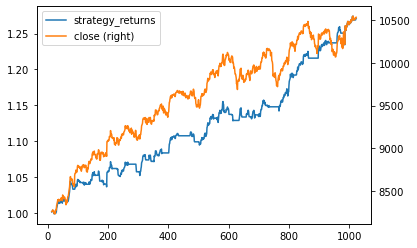

In [126]:
df1[[ 'strategy_returns', 'close']].plot(secondary_y = 'close')